In [6]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#loading in the data file
df_raw = pd.read_csv('df.csv')
df_raw.head()

,type,category,vacancy_type,vacancy,lastupdate,time of api
0,P,HOURLY,A,129,2021-03-09 08:57:03,2021-03-09 09:00:00+00:00
1,P,HOURLY,A,122,2021-03-09 09:11:03,2021-03-09 09:15:00+00:00
2,P,HOURLY,A,115,2021-03-09 09:27:03,2021-03-09 09:30:00+00:00
3,P,HOURLY,A,116,2021-03-09 09:41:03,2021-03-09 09:45:00+00:00
4,P,HOURLY,A,111,2021-03-09 09:57:03,2021-03-09 10:00:00+00:00


In [8]:
#any missing data?

df_raw.info() #no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9402 non-null   object
 1   category      9402 non-null   object
 2   vacancy_type  9402 non-null   object
 3   vacancy       9402 non-null   int64 
 4   lastupdate    9402 non-null   object
 5   time of api   9402 non-null   object
dtypes: int64(1), object(5)
memory usage: 440.8+ KB


In [9]:
#what is vacancy type? - only A
df_raw['vacancy_type'].unique()

array(['A'], dtype=object)

In [10]:
#what is type? - only P
df_raw['type'].unique()

array(['P'], dtype=object)

           vacancy
weekday           
0        86.872356
1        84.067548
2        83.672805
3        81.529104
4        82.288404
5        79.279423
6        83.058378
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


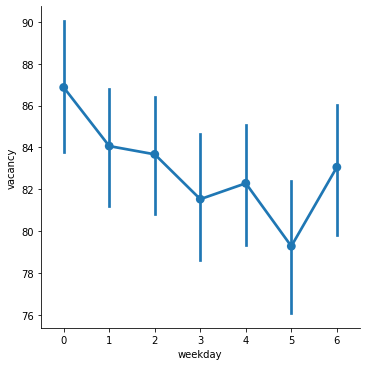

In [11]:
#Hypothesis 1: vacancy driven by weekday
#Results do not seem to support it


df_raw['time of api'] = df_raw['time of api'].apply(lambda x:pd.to_datetime(x))
df_raw['weekday'] = df_raw['time of api'].apply(lambda x:x.weekday())
df_raw['weekday'].unique() #0 to 6

print(df_raw.groupby('weekday').mean())

plot = sns.factorplot(data=df_raw, x='weekday',y='vacancy')
plot.savefig('factorPlot_weekday_vacancy')

         vacancy   weekday
hour                      
0     135.614396  2.982005
1     136.396419  2.989770
2     136.645408  2.994898
3     136.807198  2.997429
4     136.989744  2.994872
5     137.107692  3.015385
6     137.138889  2.994949
7     137.000000  2.994975
8     131.723618  3.000000
9     117.947761  2.980100
10     95.793893  2.994911
11     63.240506  2.989873
12     21.260982  3.025840
13      3.281330  3.000000
14      3.408740  2.948586
15      8.992084  2.928760
16     15.137306  2.963731
17     26.269720  2.956743
18     33.737245  2.946429
19     23.469072  2.963918
20     30.274359  2.961538
21     66.703797  2.964557
22    116.105793  2.967254
23    132.905612  2.959184
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (

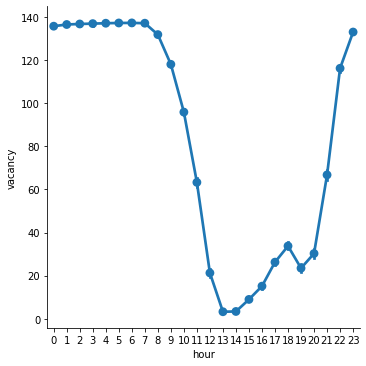

In [12]:
#hypothesis 2: vacancy affected by hour of the day
#seem to be significant in that afternoon does not have much vacancy
df_raw['hour'] = df_raw['time of api'].apply(lambda x:x.hour)
df_raw['hour'].unique() #0 to 23

print(df_raw.groupby('hour').mean())

plot = sns.factorplot(data=df_raw, x='hour',y='vacancy')
plot.savefig('factorPlot_hour_vacancy')

C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

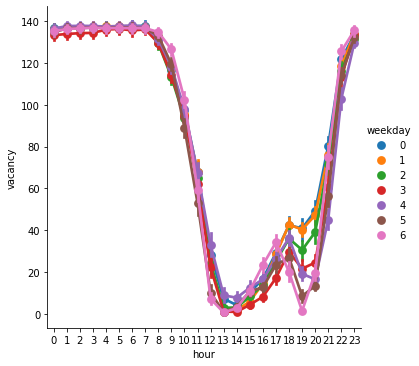

In [13]:
#what about both of the above together?
plt.figure(figsize=(20,20))
plot = sns.factorplot(data=df_raw, x='hour',y='vacancy',hue='weekday')
plot.savefig('factorPlot_hour_vacancy_weekday')

#generally the same except during dinner hour -> more vacancy during dinner hours on weekdays

[3 4 5 6]
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


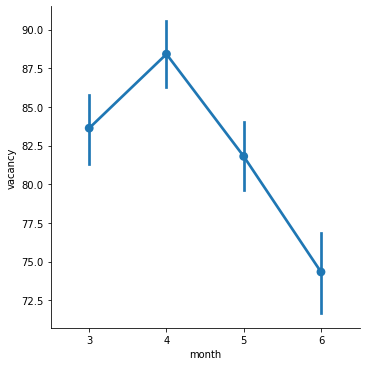

In [14]:
df_raw['month'] = df_raw['time of api'].apply(lambda x:x.month)
print(df_raw['month'].unique()) #limitation: only 3,4,5,6

plot = sns.factorplot(data=df_raw, x='month',y='vacancy')
plot.savefig('factorPlot_month_vacancy')

C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


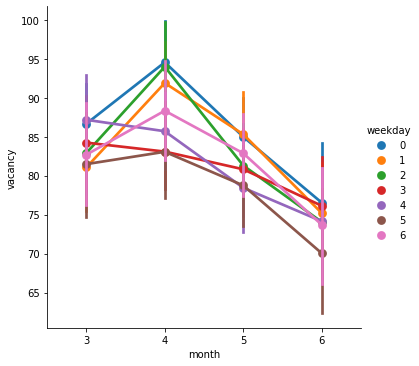

In [15]:
#weekday and month
plot = sns.factorplot(data=df_raw, x='month',y='vacancy',hue='weekday')
plot.savefig('factorplot_month_vacancy_weekday')

[ 0 15 30 45]
C:\Users\LHCHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


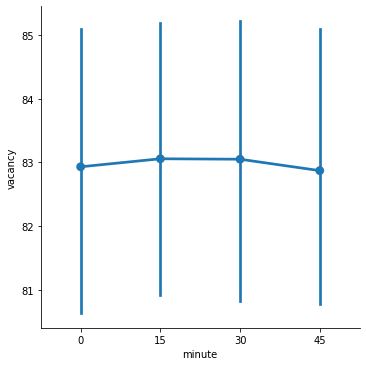

In [16]:
#based on time interval?

df_raw['minute'] = df_raw['time of api'].apply(lambda x:x.minute)
print(df_raw['minute'].unique()) #limitation: only 3,4,5,6

plot = sns.factorplot(data=df_raw, x='minute',y='vacancy')
plot.savefig('factorPlot_minute_vacancy')

In [17]:
df_raw

,type,category,vacancy_type,vacancy,lastupdate,time of api,weekday,hour,month,minute
0,P,HOURLY,A,129,2021-03-09 08:57:03,2021-03-09 09:00:00+00:00,1,9,3,0
1,P,HOURLY,A,122,2021-03-09 09:11:03,2021-03-09 09:15:00+00:00,1,9,3,15
2,P,HOURLY,A,115,2021-03-09 09:27:03,2021-03-09 09:30:00+00:00,1,9,3,30
3,P,HOURLY,A,116,2021-03-09 09:41:03,2021-03-09 09:45:00+00:00,1,9,3,45
4,P,HOURLY,A,111,2021-03-09 09:57:03,2021-03-09 10:00:00+00:00,1,10,3,0
...,...,...,...,...,...,...,...,...,...,...
9397,P,HOURLY,A,96,2021-06-17 09:11:05,2021-06-17 09:15:00+00:00,3,9,6,15
9398,P,HOURLY,A,95,2021-06-17 09:27:05,2021-06-17 09:30:00+00:00,3,9,6,30
9399,P,HOURLY,A,97,2021-06-17 09:41:05,2021-06-17 09:45:00+00:00,3,9,6,45
9400,P,HOURLY,A,90,2021-06-17 09:57:06,2021-06-17 10:00:00+00:00,3,10,6,0


In [18]:
#mean vacancy = 82.98
df_raw['vacancy'].mean()

82.97787704743672

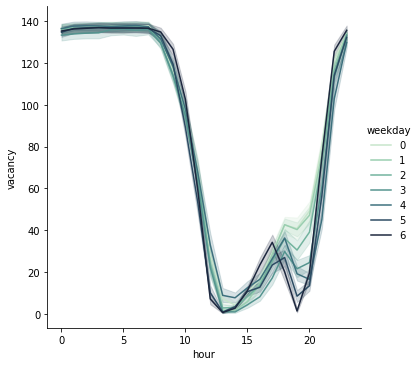

In [19]:
#relplot, clear difference on different days at around 8 pm
palette = sns.cubehelix_palette(rot=-.4,n_colors=7)
plot = sns.relplot(data=df_raw, x='hour',y='vacancy',hue='weekday', kind='line',palette=palette)
plot.savefig('relplot_hour_vacancy_weekday.png')

In [23]:
df_raw.to_csv('df_cleaned.csv',index=False)

<AxesSubplot:>

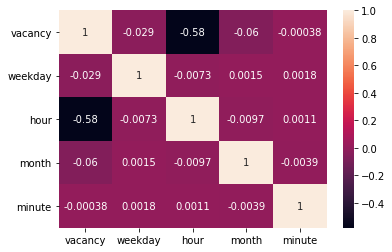

In [22]:

sns.heatmap(df_raw.corr(),annot=True)